In [8]:
# import training data
import pandas as pd 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
# separating data inputs and output lables 
train_x = train.iloc[:, 0:len(train.columns) - 2]
train_label = train.iloc[:, -1]
test_x  = test.iloc[:, 0:len(train.columns) - 2]
test_label = test.iloc[:, -1]


In [10]:
# encoding labels 
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(train_label)
train_y = encoder.transform(train_label)
count = [0, 0, 0, 0, 0, 0, 0]
for i in range (len(train_y)):
    if train_y[i] == 0:
        train_y[i] = 6
        count[6] += 1
    elif train_y[i] == 1:
        train_y[i] = 4
        count[4] += 1
    elif train_y[i] == 2:
        train_y[i] = 5
        count[5] += 1
    elif train_y[i] == 3:
        train_y[i] = 1
        count[1] += 1
    elif train_y[i] == 4:
        train_y[i] = 3
        count[3] += 1
    elif train_y[i] == 5:
        train_y[i] = 2
        count[2] += 1
# encoding test labels 
encoder.fit(test_label)
test_y = encoder.transform(test_label)
for i in range (len(test_y)):
    if test_y[i] == 0:
        test_y[i] = 6
    elif test_y[i] == 1:
        test_y[i] = 4
    elif test_y[i] == 2:
        test_y[i] = 5
    elif test_y[i] == 3:
        test_y[i] = 1
    elif test_y[i] == 4:
        test_y[i] = 3
    elif test_y[i] == 5:
        test_y[i] = 2
print(count)

[0, 1226, 1073, 986, 1286, 1374, 1407]


In [7]:
# svm
from sklearn import svm
from sklearn.metrics import confusion_matrix
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)
print(accuracy_score(test_y,pred_y))
confusion_matrix(test_y, pred_y)

0.9402782490668476


array([[537,   0,   0,   0,   0,   0],
       [  0, 424,  65,   0,   0,   2],
       [  0,  44, 488,   0,   0,   0],
       [  0,   0,   0, 492,   4,   0],
       [  0,   0,   0,  13, 378,  29],
       [  0,   0,   0,  17,   2, 452]])

In [154]:
# decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)
confusion_matrix(test_y, pred_y)

array([[537,   0,   0,   0,   0,   0],
       [  0, 375, 116,   0,   0,   0],
       [  0,  74, 458,   0,   0,   0],
       [  0,   0,   0, 437,  18,  41],
       [  0,   0,   0,  18, 347,  55],
       [  0,   0,   0,  81,  36, 354]])

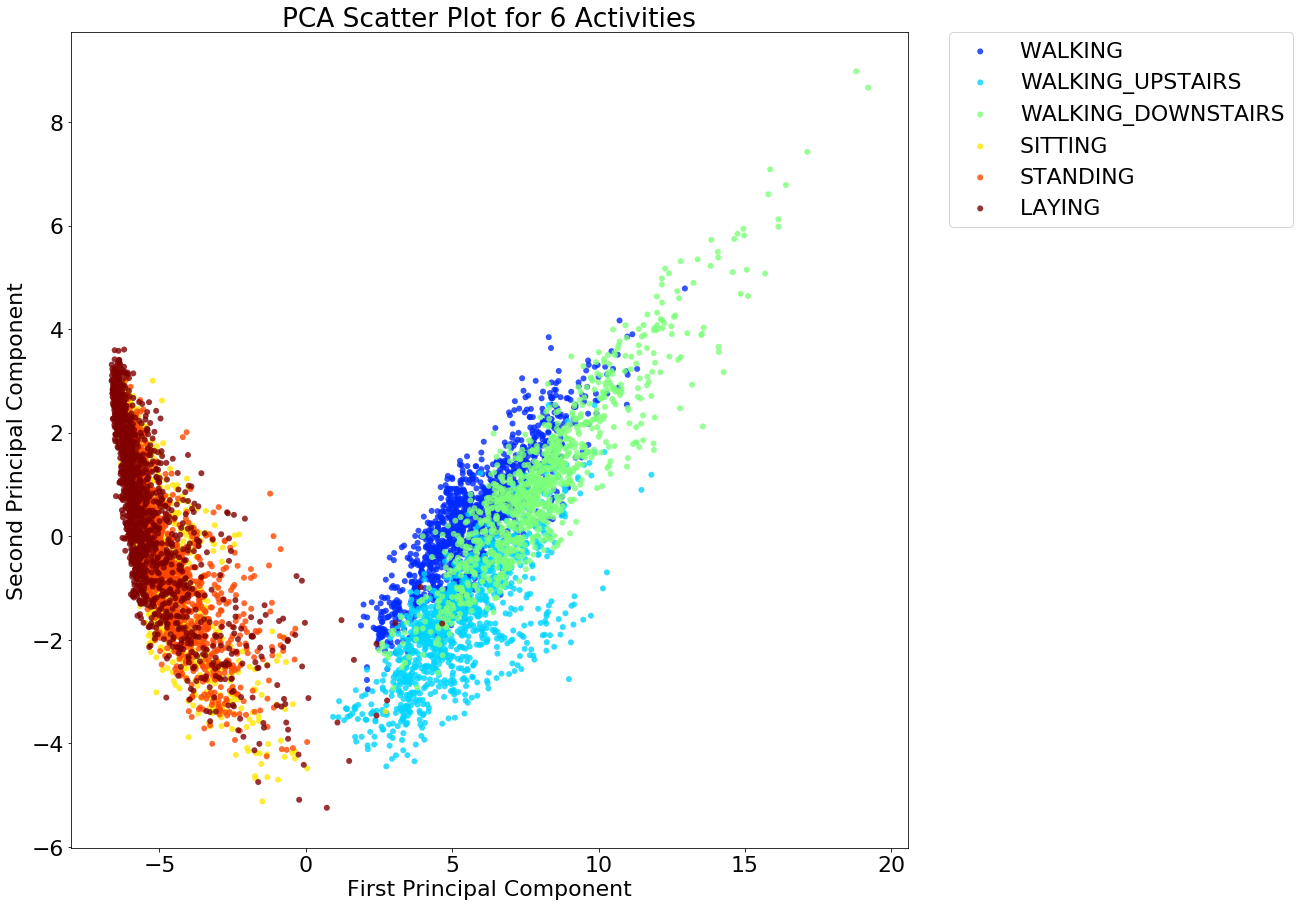

In [12]:
# pca
from sklearn.decomposition import PCA as PCA
import matplotlib.pyplot as plt 
pca = PCA(n_components = 2)
pca_train_x = pca.fit_transform(train_x)
plt.figure(figsize=(15,15))
font = {'size'   : 22}
plt.rc('font', **font) 
unique = list(set(train_y))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
for i, u in enumerate(unique):
    xi = [pca_train_x[:,0][j] for j  in range(len(pca_train_x[:,0])) if train_y[j] == u]
    yi = [pca_train_x[:,1][j] for j  in range(len(pca_train_x[:,1])) if train_y[j] == u]
    labelx = ""
    if u == 1:
        labelx = "WALKING "
    elif u == 2:
        labelx = "WALKING_UPSTAIRS"
    elif u == 3:
        labelx = "WALKING_DOWNSTAIRS"
    elif u == 4:
        labelx = "SITTING "
    elif u == 5:
        labelx = "STANDING"
    elif u == 6:
        labelx = "LAYING "
    plt.scatter(xi, yi, c=colors[i], label = labelx, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('nipy_spectral', 1))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot for 6 Activities")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
# #plt.savefig('/Users/zhangsi929/Desktop/pca6.png')

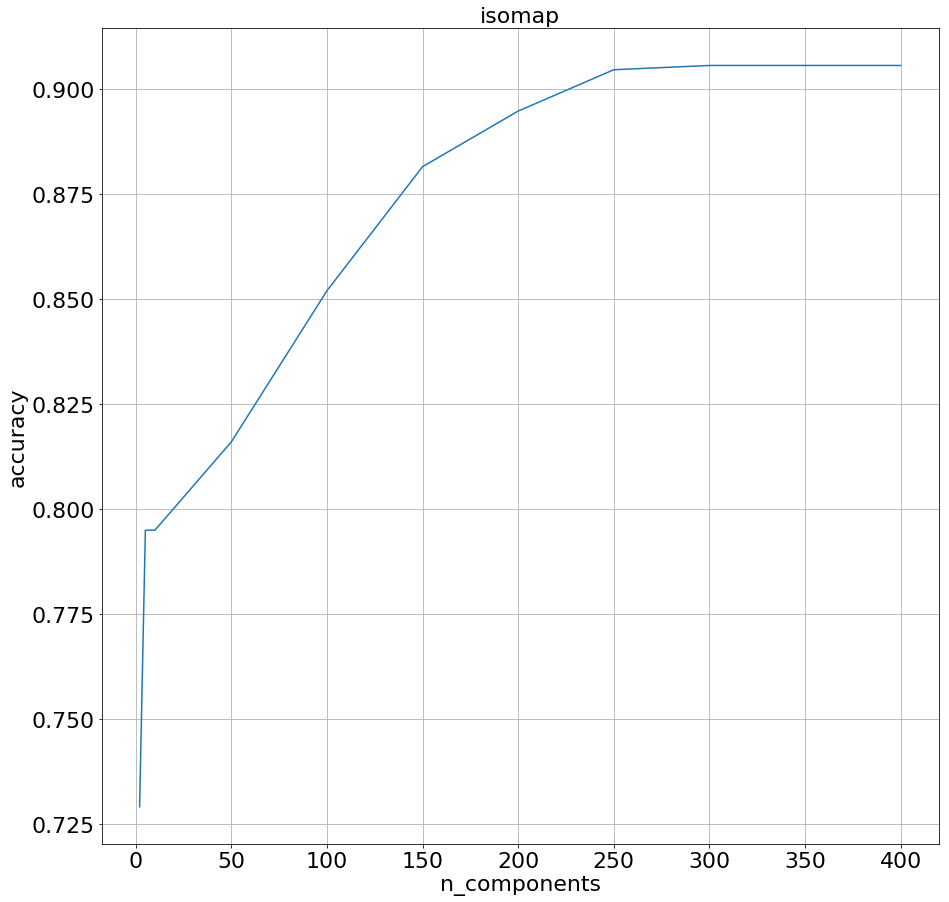

In [29]:
# Feature Selection: Isomap + SVM
from sklearn import manifold, datasets
from sklearn.metrics import accuracy_score
n_neighbors = 10
pcs = [2, 5, 10, 50,100,150,200,250,300,400]
iso_pc = []
for pcs_num in pcs:
    isomap = manifold.Isomap(n_neighbors, n_components = pcs_num)
    iso_train_x = isomap.fit_transform(train_x)
    iso_test_x = isomap.transform(test_x)
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(iso_train_x, train_y)
    iso_pred_y = clf.predict(iso_test_x)
    iso_pc.append(accuracy_score(test_y,iso_pred_y,))
    

import matplotlib.pyplot as plt
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
plt.plot(pcs,iso_pc)
plt.xlabel('n_components',fontsize=22)
plt.ylabel('accuracy',fontsize=22)
plt.title('isomap',fontsize=22)
#plt.savefig('/Users/zhangsi929/Desktop/iso+svm.png')
plt.rc('font', **font)
plt.grid(True)

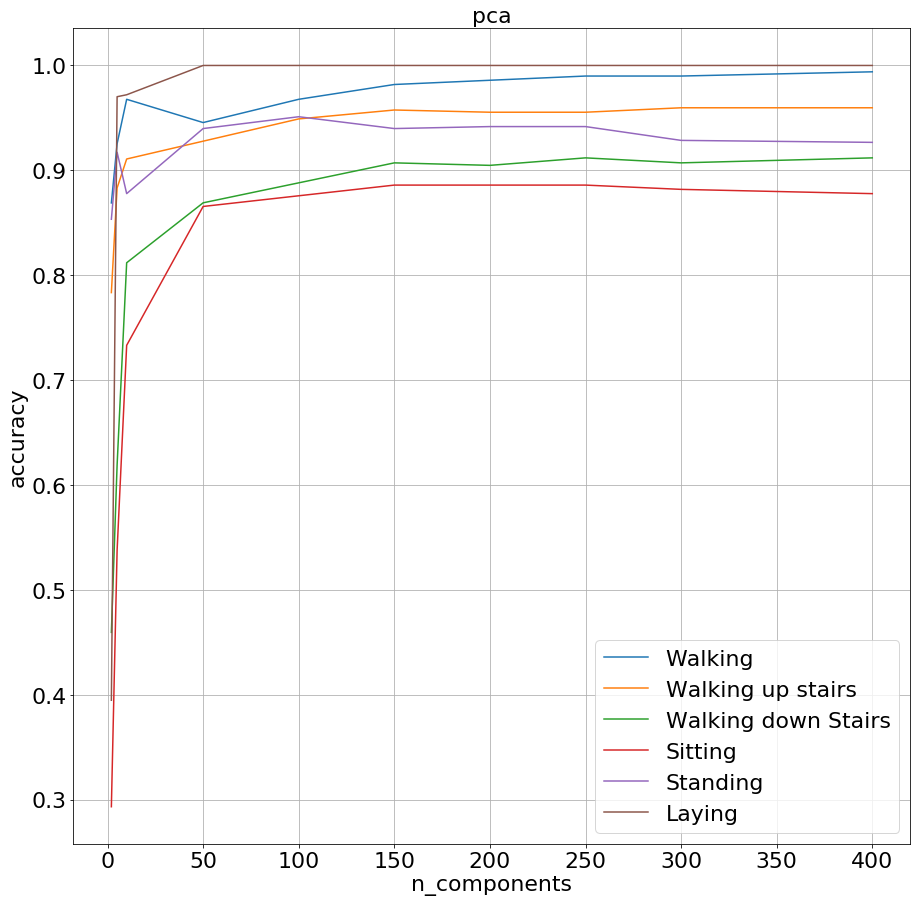

In [16]:
# Feature Seletction: PCA + SVM 
from sklearn.decomposition import PCA as PCA
import matplotlib.pyplot as plt 
from sklearn import svm
from sklearn.metrics import accuracy_score
pcs = [2,5,10,50,100,150,200,250,300,400]
pca_pc = []
pca_pc_1 = []
pca_pc_2 = []
pca_pc_3 = []
pca_pc_4 = []
pca_pc_5 = []
pca_pc_6 = []
#plot the change of accuracy for each class
for pcs_num in pcs:
    pca = PCA(n_components = pcs_num)
    pca_train_x = pca.fit_transform(train_x)
    pca_test_x = pca.transform(test_x)
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(pca_train_x, train_y)
    pca_pred_y = clf.predict(pca_test_x) 
    #预测完毕 得到pca_pred_y
    #需要挑选出来制定的 test_y 和 pca_pred_y 来进行比较
    test_y_1 = []
    pca_pred_y_1 = []
    test_y_2 = []
    pca_pred_y_2 = []
    test_y_3 = []
    pca_pred_y_3 = []
    test_y_4 = []
    pca_pred_y_4 = []
    test_y_5 = []
    pca_pred_y_5 = []
    test_y_6 = []
    pca_pred_y_6 = []
    for i in range(len(test_y)):
        if (test_y[i] == 1):
            test_y_1.append(test_y[i]);
            pca_pred_y_1.append(pca_pred_y[i])
        elif (test_y[i] == 2):
            test_y_2.append(test_y[i]);
            pca_pred_y_2.append(pca_pred_y[i])
        elif (test_y[i] == 3):
            test_y_3.append(test_y[i]);
            pca_pred_y_3.append(pca_pred_y[i])
        elif (test_y[i] == 4):
            test_y_4.append(test_y[i]);
            pca_pred_y_4.append(pca_pred_y[i])
        elif (test_y[i] == 5):
            test_y_5.append(test_y[i]);
            pca_pred_y_5.append(pca_pred_y[i])
        elif (test_y[i] == 6):
            test_y_6.append(test_y[i]);
            pca_pred_y_6.append(pca_pred_y[i])
    pca_pc.append(accuracy_score(test_y,pca_pred_y,));
    pca_pc_1.append(accuracy_score(test_y_1,pca_pred_y_1,))
    pca_pc_2.append(accuracy_score(test_y_2,pca_pred_y_2,))
    pca_pc_3.append(accuracy_score(test_y_3,pca_pred_y_3,))
    pca_pc_4.append(accuracy_score(test_y_4,pca_pred_y_4,))
    pca_pc_5.append(accuracy_score(test_y_5,pca_pred_y_5,))
    pca_pc_6.append(accuracy_score(test_y_6,pca_pred_y_6,))
    
import matplotlib.pyplot as plt
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
line1, = plt.plot(pcs,pca_pc_1,label='Walking')
line2, = plt.plot(pcs,pca_pc_2,label='Walking up stairs')
line3, = plt.plot(pcs,pca_pc_3,label='Walking down Stairs')
line4, = plt.plot(pcs,pca_pc_4,label='Sitting')
line5, = plt.plot(pcs,pca_pc_5,label='Standing')
line6, = plt.plot(pcs,pca_pc_6,label='Laying')
plt.legend(handles=[line1, line2, line3, line4, line5, line6])
plt.xlabel('n_components',fontsize=22)
plt.ylabel('accuracy',fontsize=22)
plt.title('pca',fontsize=22)
#plt.savefig('/Users/zhangsi929/Desktop/pca+svm.png')
plt.rc('font', **font)
plt.grid(True)
#plot for general accuracy with all six activities
# font = {'size'   : 22}
# plt.rc('font', **font) 
# plt.figure(figsize=(15,15))
# plt.plot(pcs,pca_pc)
# plt.xlabel('n_components',fontsize=22)
# plt.ylabel('accuracy',fontsize=22)
# plt.title('pca',fontsize=22)
# #plt.savefig('/Users/zhangsi929/Desktop/pca+svm.png')
# plt.rc('font', **font)
# plt.grid(True)

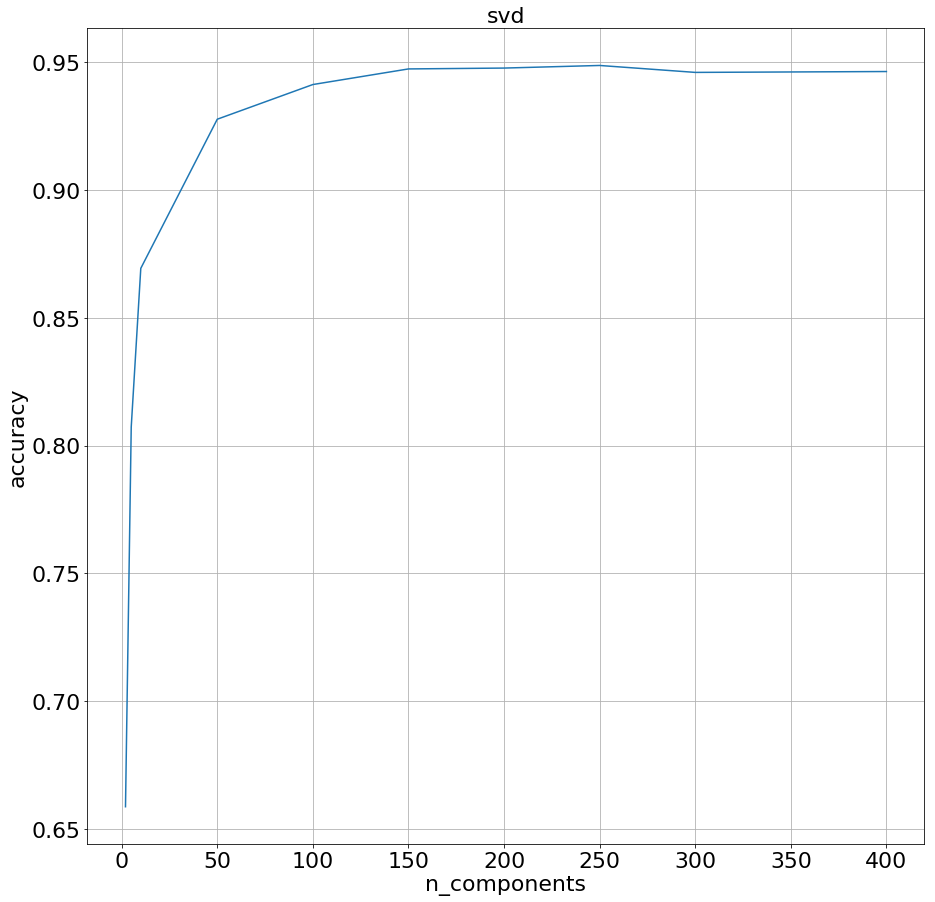

In [26]:
# svd + svm
from sklearn.decomposition import TruncatedSVD
pcs = [2,5,10,50,100,150,200,250,300,400]
svd_pc = []
for pcs_num in pcs:
    svd = TruncatedSVD(n_components=pcs_num, n_iter=7)
    svd_train_x = svd.fit(train_x).transform(train_x)
    svd_test_x = svd.transform(test_x)
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(svd_train_x, train_y)
    svd_pred_y = clf.predict(svd_test_x)
    svd_pc.append(accuracy_score(test_y,svd_pred_y))
    
import matplotlib.pyplot as plt
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
plt.plot(pcs,svd_pc)
plt.xlabel('n_components',fontsize=22)
plt.ylabel('accuracy',fontsize=22)
plt.title('svd',fontsize=22)
#plt.savefig('/Users/zhagsi929/Desktop/svd.png')
plt.rc('font', **font)
plt.grid(True)

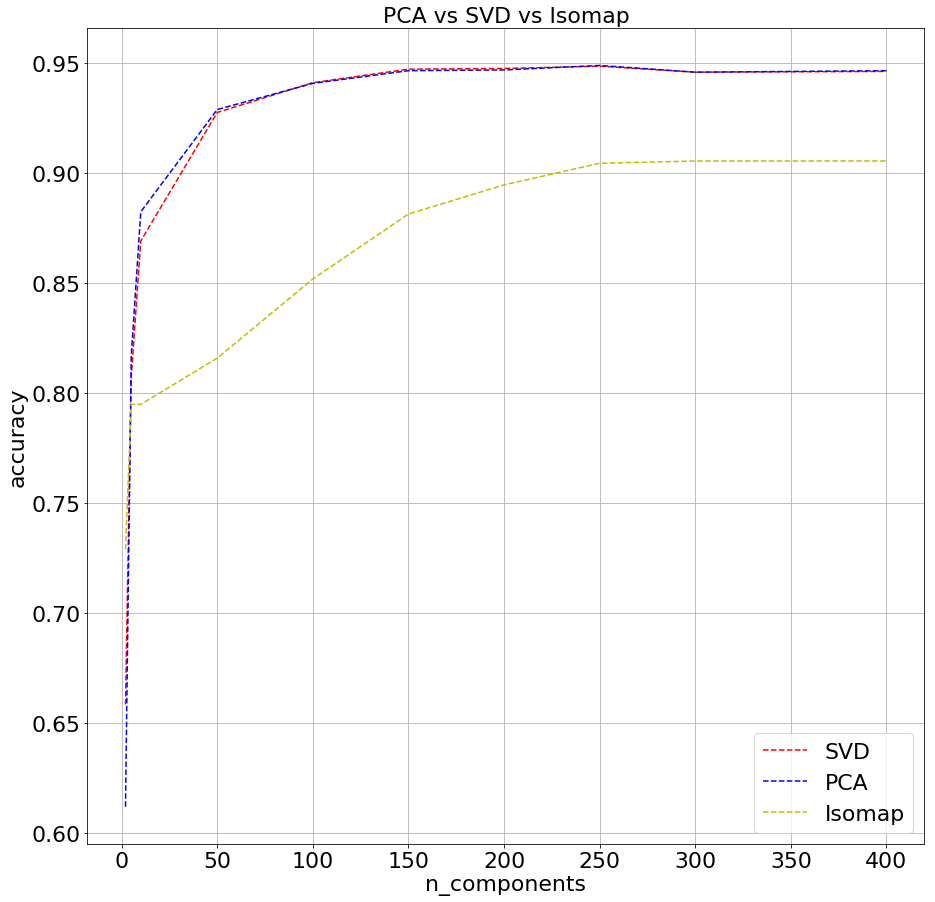

In [34]:
#svd vs pca vs isomap
import matplotlib.pyplot as plt
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
line1, = plt.plot(pcs,svd_pc,'r--',label='SVD')
line2, = plt.plot(pcs,pca_pc,'b--',label='PCA')
line3, = plt.plot(pcs,iso_pc, 'y--',label='Isomap')
plt.xlabel('n_components',fontsize=22)
plt.ylabel('accuracy',fontsize=22)
plt.title('PCA vs SVD vs Isomap',fontsize=22)
plt.legend(handles=[line1, line2, line3])
#plt.savefig('/Users/zhaobi/Desktop/pca_svd.png')
plt.rc('font', **font)
plt.grid(True)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 561 out of 561 | elapsed: 20.1min finished

[2018-05-01 01:35:39] Features: 1/10 -- score: 0.5252992383025027[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed: 15.1min finished

[2018-05-01 01:50:43] Features: 2/10 -- score: 0.7908052230685527[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 559 out of 559 | elapsed:  9.2min finished

[2018-05-01 01:59:53] Features: 3/10 -- score: 0.8412676822633297[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 558 out of 558 | elapsed:  8.1min finished

[2018-05-01 02:08:01] Features: 4/10 -- score: 0.8807127312295974[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 557 out of 557 | elapsed:  7.

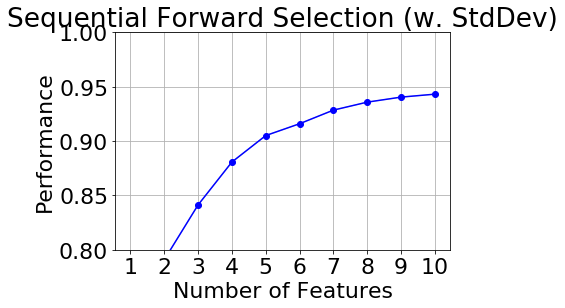

In [172]:
# sfs + svm
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
clf = svm.SVC(decision_function_shape='ovo')
sfs = SFS(clf, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
import numpy as np
train_x_arr = np.asarray(train_x)
train_y_arr = np.asarray(train_y)
sfs = sfs.fit(train_x_arr, train_y_arr)

#plot sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [27]:
#plot sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

NameError: name 'sfs' is not defined

In [15]:
#decision of PCA n_component
from sklearn.decomposition import PCA
pca = PCA(n_components = 250)
pca_train_x = pca.fit_transform(train_x)
pca_test_x = pca.transform(test_x)

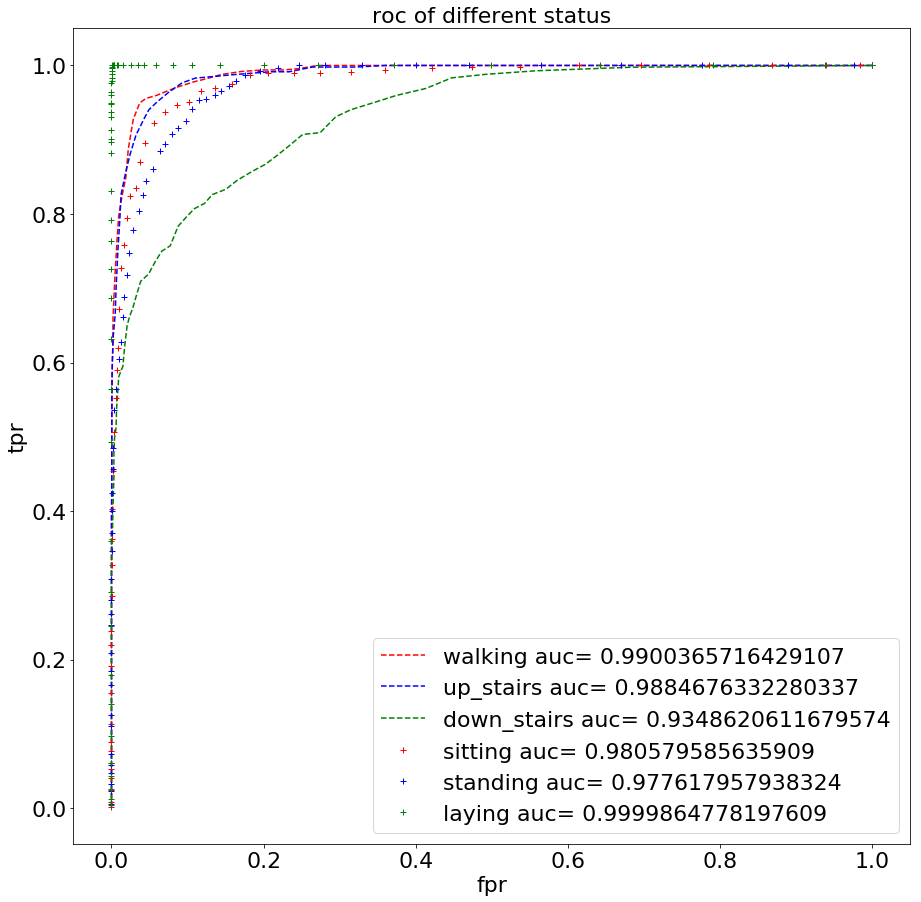

In [17]:
# random forest roc vs class
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
clf_rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=70, max_depth=None, min_samples_split=2, random_state=0))
train_y_bi = label_binarize(train_y, classes=[1, 2, 3, 4, 5, 6])
test_y_bi = label_binarize(test_y, classes=[1, 2, 3, 4, 5, 6])
pred_y_rf = clf_rf.fit(pca_train_x, train_y_bi).predict_proba(pca_test_x)
# plot roc
import matplotlib.pyplot as plt
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
graph_label = ['walking', 'up_stairs', 'down_stairs', 'sitting', 'standing', 'laying']
for i in range(6):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(test_y_bi[:, i], pred_y_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
line1,=plt.plot(fpr_rf[0],tpr_rf[0],'r--',label=graph_label[0]+ ' auc= ' + str(roc_auc_rf[0]))
line2,=plt.plot(fpr_rf[1],tpr_rf[1],'b--',label=graph_label[1]+ ' auc= ' + str(roc_auc_rf[1]))
line3,=plt.plot(fpr_rf[2],tpr_rf[2],'g--',label=graph_label[2]+ ' auc= ' + str(roc_auc_rf[2]))
line4,=plt.plot(fpr_rf[3],tpr_rf[3],'r+',label=graph_label[3]+ ' auc= ' + str(roc_auc_rf[3]))
line5,=plt.plot(fpr_rf[4],tpr_rf[4],'b+',label=graph_label[4]+ ' auc= ' + str(roc_auc_rf[4]))
line6,=plt.plot(fpr_rf[5],tpr_rf[5],'g+',label=graph_label[5]+ ' auc= ' + str(roc_auc_rf[5]))
plt.xlabel('fpr',fontsize=22)
plt.ylabel('tpr',fontsize=22)
plt.title('roc of different status',fontsize=22)
plt.legend(handles=[line1, line2, line3, line4, line5, line6])
#plt.savefig('/Users/zhaobi/Desktop/pca_svd.png')
plt.rc('font', **font)
plt.show()    